In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
import random

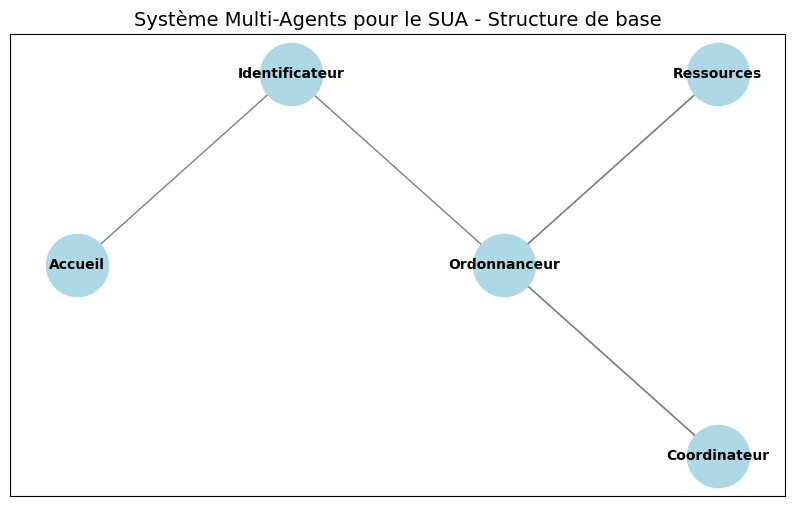

In [2]:
# Définition des agents et des interactions possibles
agents = ["Accueil", "Identificateur", "Ordonnanceur", "Ressources", "Coordinateur"]
interactions_base = [
    ("Accueil", "Identificateur"),  # Envoi des données du patient
    ("Identificateur", "Ordonnanceur"),  # Transmission du triage
    ("Ordonnanceur", "Ressources"),  # Demande de ressources
    ("Ordonnanceur", "Coordinateur"),  # Instructions au personnel
    ("Coordinateur", "Ordonnanceur"),  # Retour humain
    ("Ressources", "Ordonnanceur"),  # Mise à jour des ressources
]

# Exemple de séquence pour un patient
sequence_patient = [
    ("Accueil", "Identificateur", "Patient ID123 enregistré"),
    ("Identificateur", "Ordonnanceur", "Triage: Niveau 1"),
    ("Ordonnanceur", "Ressources", "Demande défibrillateur"),
    ("Ressources", "Ordonnanceur", "Défibrillateur disponible"),
    ("Ordonnanceur", "Coordinateur", "Mobiliser équipe réanimation"),
]

# Création du graphe de base
G = nx.DiGraph()
G.add_nodes_from(agents)
G.add_edges_from(interactions_base)

# Positions des nœuds pour une disposition claire
pos = {
    "Accueil": (0, 0),
    "Identificateur": (2, 2),
    "Ordonnanceur": (4, 0),
    "Ressources": (6, 2),
    "Coordinateur": (6, -2)
}

# Initialisation de la figure
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Système Multi-Agents pour le SUA", fontsize=14)

# Dessin du graphe de base (statique)
def draw_base_graph():
    ax.clear()
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=2000, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color="gray", arrowsize=20, ax=ax)
    plt.title("Système Multi-Agents pour le SUA - Structure de base", fontsize=14)

# Animation pour simuler le flux d’un patient
def update(frame):
    ax.clear()
    draw_base_graph()  # Dessiner la structure de base
    
    # Mettre en évidence l’étape actuelle
    if frame < len(sequence_patient):
        source, target, label = sequence_patient[frame]
        # Nœuds actifs en rouge
        nx.draw_networkx_nodes(G, pos, nodelist=[source, target], node_color="red", node_size=2000, ax=ax)
        # Flèche active en rouge
        nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], edge_color="red", arrowsize=30, ax=ax)
        # Ajouter une étiquette pour le message
        mid_x = (pos[source][0] + pos[target][0]) / 2
        mid_y = (pos[source][1] + pos[target][1]) / 2
        ax.text(mid_x, mid_y + 0.2, label, fontsize=10, color="black", ha="center")
    
    plt.title(f"Système Multi-Agents pour le SUA - Étape {frame + 1}", fontsize=14)

# Dessiner le graphe initial
draw_base_graph()

# Créer l’animation
ani = FuncAnimation(fig, update, frames=len(sequence_patient) + 1, interval=1500, repeat=False)

# Afficher la visualisation
plt.show()

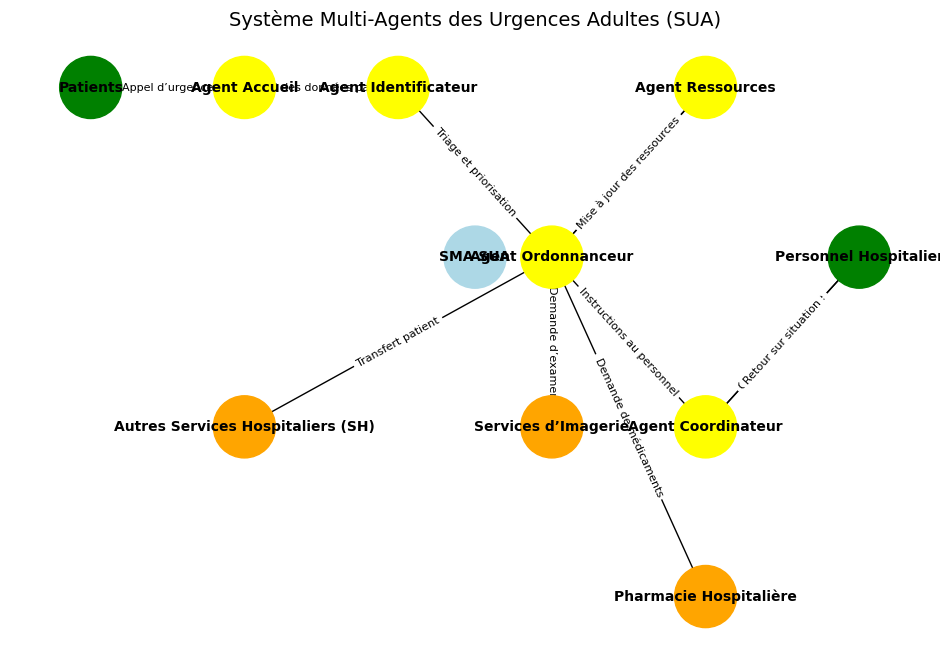

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Création du graphe
G = nx.DiGraph()
G.add_node("SMA SUA", color="lightblue")

# Ajout des agents (en jaune, comme dans votre image)
agents = ["Agent Accueil", "Agent Identificateur", "Agent Ordonnanceur", "Agent Ressources", "Agent Coordinateur"]
for agent in agents:
    G.add_node(agent, color="yellow")

# Ajout des entités externes et flux
external_nodes = [
    ("Patients", "green"),  # Patients en vert
    ("Personnel Hospitalier", "green"),
    ("Services d’Imagerie", "orange"),
    ("Pharmacie Hospitalière", "orange"),
    ("Autres Services Hospitaliers (SH)", "orange")
]
for node, color in external_nodes:
    G.add_node(node, color=color)

# Ajout des interactions (flèches avec étiquettes)
interactions = [
    ("Patients", "Agent Accueil", "Appel d’urgence"),
    ("Agent Accueil", "Agent Identificateur", "Envoi des données patient"),
    ("Agent Identificateur", "Agent Ordonnanceur", "Triage et priorisation"),
    ("Agent Ordonnanceur", "Agent Ressources", "Demande de ressources"),
    ("Agent Ordonnanceur", "Agent Coordinateur", "Instructions au personnel"),
    ("Agent Coordinateur", "Personnel Hospitalier", "Coordination humaine"),
    ("Agent Ressources", "Agent Ordonnanceur", "Mise à jour des ressources"),
    ("Agent Ordonnanceur", "Services d’Imagerie", "Demande d’examen"),
    ("Agent Ordonnanceur", "Pharmacie Hospitalière", "Demande de médicaments"),
    ("Agent Ordonnanceur", "Autres Services Hospitaliers (SH)", "Transfert patient"),
    ("Personnel Hospitalier", "Agent Coordinateur", "Retour sur situation"),
]

G.add_edges_from([(src, dst, {"label": label}) for src, dst, label in interactions])

# Positions des nœuds pour une disposition claire (similaire à votre image)
pos = {
    "SMA SUA": (5, 0),
    "Agent Accueil": (2, 2),
    "Agent Identificateur": (4, 2),
    "Agent Ordonnanceur": (6, 0),
    "Agent Ressources": (8, 2),
    "Agent Coordinateur": (8, -2),
    "Patients": (0, 2),
    "Personnel Hospitalier": (10, 0),
    "Services d’Imagerie": (6, -2),
    "Pharmacie Hospitalière": (8, -4),
    "Autres Services Hospitaliers (SH)": (2, -2)
}

# Dessin du graphe
plt.figure(figsize=(12, 8))
plt.title("Système Multi-Agents des Urgences Adultes (SUA)", fontsize=14)

# Dessiner les nœuds avec des tailles et couleurs différentes pour simuler des formes
node_colors = [G.nodes[n]["color"] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)  # Utilisation de cercles par défaut
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Dessiner les arêtes et les étiquettes
nx.draw_networkx_edges(G, pos, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Ajuster l’affichage
plt.axis("off")
plt.show()

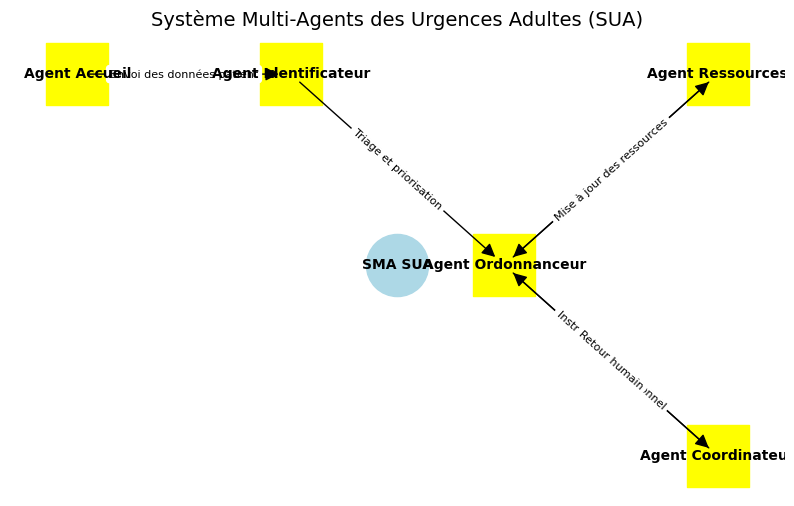

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Création du graphe
G = nx.DiGraph()
G.add_node("SMA SUA", color="lightblue")  # Nœud central en bleu, cercle par défaut

# Ajout des agents (en jaune, carrés)
agents = ["Agent Accueil", "Agent Identificateur", "Agent Ordonnanceur", "Agent Ressources", "Agent Coordinateur"]
for agent in agents:
    G.add_node(agent, color="yellow")

# Ajout des interactions (flèches avec étiquettes, basées sur notre projet)
interactions = [
    ("Agent Accueil", "Agent Identificateur", "Envoi des données patient"),
    ("Agent Identificateur", "Agent Ordonnanceur", "Triage et priorisation"),
    ("Agent Ordonnanceur", "Agent Ressources", "Demande de ressources"),
    ("Agent Ordonnanceur", "Agent Coordinateur", "Instructions au personnel"),
    ("Agent Ressources", "Agent Ordonnanceur", "Mise à jour des ressources"),
    ("Agent Coordinateur", "Agent Ordonnanceur", "Retour humain"),
]

G.add_edges_from([(src, dst, {"label": label}) for src, dst, label in interactions])

# Positions des nœuds pour une disposition claire (SMA au centre, agents autour)
pos = {
    "SMA SUA": (5, 0),
    "Agent Accueil": (2, 2),
    "Agent Identificateur": (4, 2),
    "Agent Ordonnanceur": (6, 0),
    "Agent Ressources": (8, 2),
    "Agent Coordinateur": (8, -2)
}

# Dessin du graphe
plt.figure(figsize=(10, 6))
plt.title("Système Multi-Agents des Urgences Adultes (SUA)", fontsize=14)

# Dessiner les nœuds avec des formes et couleurs différentes
node_colors = [G.nodes[n]["color"] for n in G.nodes()]
for node in G.nodes():
    if node == "SMA SUA":
        plt.scatter(pos[node][0], pos[node][1], s=2000, c=G.nodes[node]["color"], marker='o')  # Cercle pour SMA
    else:
        plt.scatter(pos[node][0], pos[node][1], s=2000, c=G.nodes[node]["color"], marker='s')  # Carré pour agents

nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Dessiner les arêtes et les étiquettes
nx.draw_networkx_edges(G, pos, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Ajuster l’affichage
plt.axis("off")
plt.show()

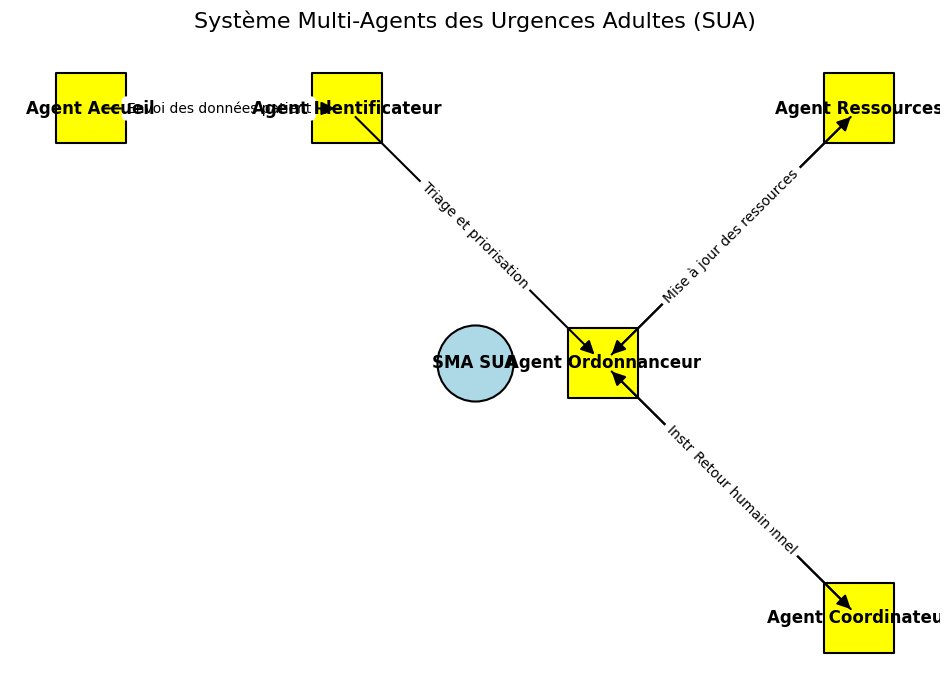

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Création du graphe
G = nx.DiGraph()
G.add_node("SMA SUA", color="lightblue")  # Nœud central en bleu, cercle

# Ajout des agents (en jaune, carrés)
agents = ["Agent Accueil", "Agent Identificateur", "Agent Ordonnanceur", "Agent Ressources", "Agent Coordinateur"]
for agent in agents:
    G.add_node(agent, color="yellow")

# Ajout des interactions (flèches avec étiquettes, basées sur votre image)
interactions = [
    ("Agent Accueil", "Agent Identificateur", "Envoi des données patient"),
    ("Agent Identificateur", "Agent Ordonnanceur", "Triage et priorisation"),
    ("Agent Ordonnanceur", "Agent Ressources", "Demande de ressources"),
    ("Agent Ordonnanceur", "Agent Coordinateur", "Instructions au personnel"),
    ("Agent Ressources", "Agent Ordonnanceur", "Mise à jour des ressources"),
    ("Agent Coordinateur", "Agent Ordonnanceur", "Retour humain"),
]

G.add_edges_from([(src, dst, {"label": label}) for src, dst, label in interactions])

# Positions des nœuds pour une disposition identique à votre image (SMA au centre, agents autour)
pos = {
    "SMA SUA": (5, 0),
    "Agent Accueil": (2, 2),
    "Agent Identificateur": (4, 2),
    "Agent Ordonnanceur": (6, 0),
    "Agent Ressources": (8, 2),
    "Agent Coordinateur": (8, -2)
}

# Dessin du graphe
plt.figure(figsize=(12, 8))
plt.title("Système Multi-Agents des Urgences Adultes (SUA)", fontsize=16, pad=20)

# Dessiner les nœuds avec des formes et couleurs identiques à votre image
node_colors = [G.nodes[n]["color"] for n in G.nodes()]
for node in G.nodes():
    if node == "SMA SUA":
        plt.scatter(pos[node][0], pos[node][1], s=3000, c=G.nodes[node]["color"], marker='o', edgecolors='black', linewidths=1.5)  # Cercle bleu pour SMA
    else:
        plt.scatter(pos[node][0], pos[node][1], s=2500, c=G.nodes[node]["color"], marker='s', edgecolors='black', linewidths=1.5)  # Carrés jaunes pour agents

# Ajouter les étiquettes des nœuds
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")

# Dessiner les arêtes et les étiquettes
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color="black", width=1.5)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="black", label_pos=0.5)

# Ajuster l’affichage
plt.axis("off")
plt.show()

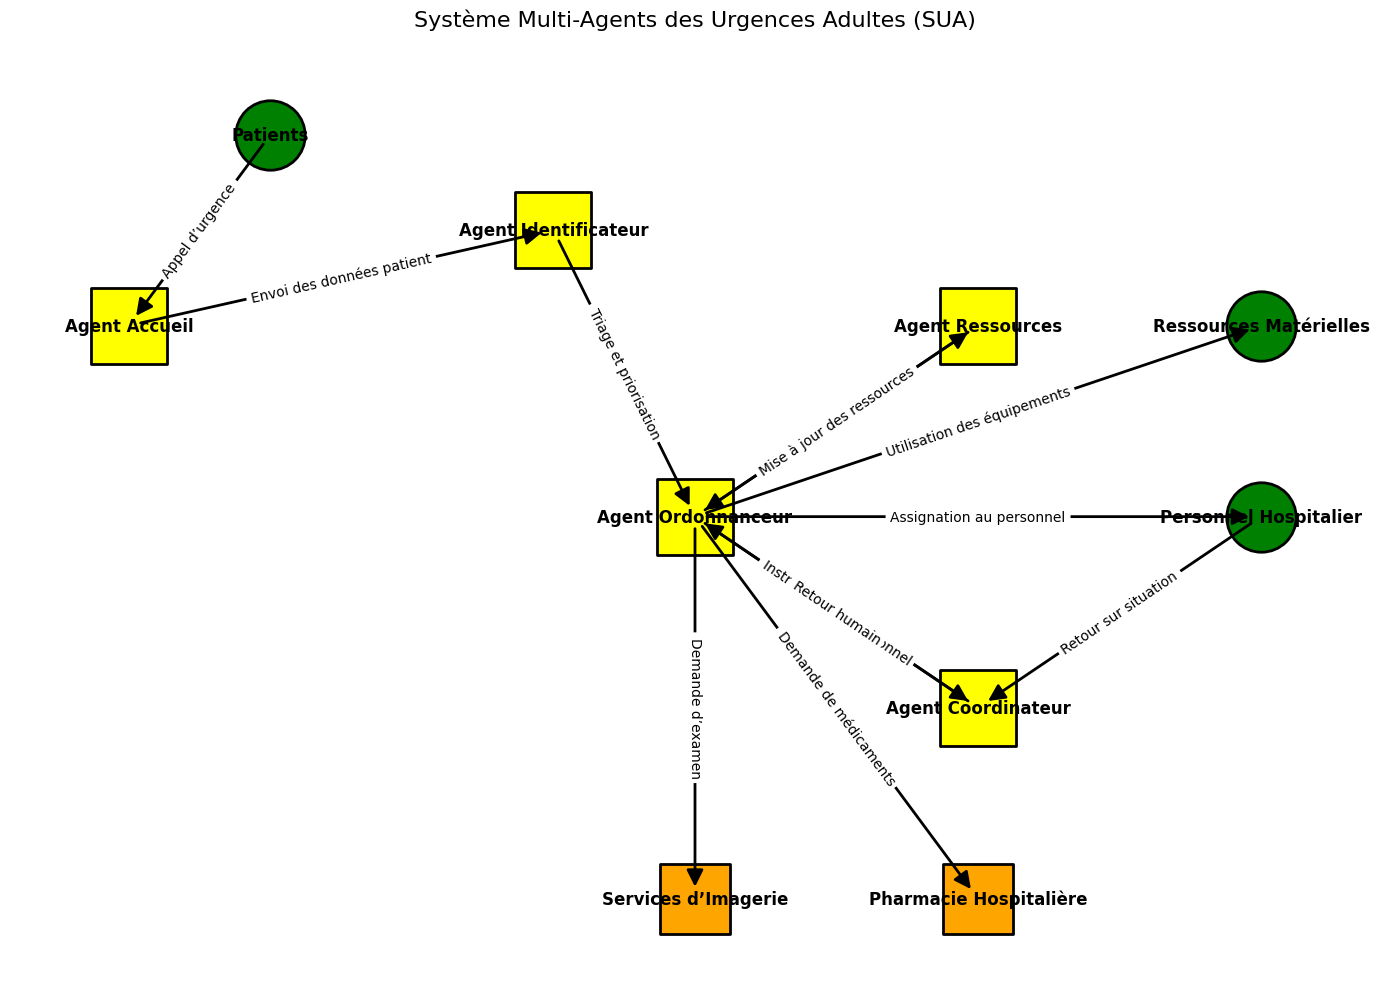

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Création du graphe
G = nx.DiGraph()

# Ajout des agents (en jaune, carrés)
agents = ["Agent Accueil", "Agent Identificateur", "Agent Ordonnanceur", "Agent Ressources", "Agent Coordinateur"]
for agent in agents:
    G.add_node(agent, color="yellow")

# Ajout des entités externes (patients, personnel, ressources, services)
external_nodes = [
    ("Patients", "green", "o"),  # Patients en vert, cercles
    ("Personnel Hospitalier", "green", "o"),  # Personnel en vert, cercles
    ("Ressources Matérielles", "green", "o"),  # Ressources matérielles en vert, cercles
    ("Services d’Imagerie", "orange", "s"),  # Services en orange, carrés
    ("Pharmacie Hospitalière", "orange", "s")  # Pharmacie en orange, carrés
]
for node, color, shape in external_nodes:
    G.add_node(node, color=color, shape=shape)

# Ajout des interactions (flèches avec étiquettes, basées sur notre projet)
interactions = [
    ("Patients", "Agent Accueil", "Appel d’urgence"),  # Patients entrent via l’Agent Accueil
    ("Agent Accueil", "Agent Identificateur", "Envoi des données patient"),
    ("Agent Identificateur", "Agent Ordonnanceur", "Triage et priorisation"),
    ("Agent Ordonnanceur", "Agent Ressources", "Demande de ressources"),
    ("Agent Ordonnanceur", "Agent Coordinateur", "Instructions au personnel"),
    ("Agent Ressources", "Agent Ordonnanceur", "Mise à jour des ressources"),
    ("Agent Coordinateur", "Agent Ordonnanceur", "Retour humain"),
    ("Agent Ordonnanceur", "Ressources Matérielles", "Utilisation des équipements"),  # Interaction avec ressources
    ("Agent Ordonnanceur", "Personnel Hospitalier", "Assignation au personnel"),  # Interaction avec personnel
    ("Agent Ordonnanceur", "Services d’Imagerie", "Demande d’examen"),  # Interaction avec services externes
    ("Agent Ordonnanceur", "Pharmacie Hospitalière", "Demande de médicaments"),  # Interaction avec pharmacie
    ("Personnel Hospitalier", "Agent Coordinateur", "Retour sur situation"),  # Retour du personnel
]

G.add_edges_from([(src, dst, {"label": label}) for src, dst, label in interactions])

# Positions des nœuds pour une disposition claire (patients en haut, agents au centre, externes en bas)
pos = {
    "Patients": (3, 4),  # Haut (entrée des patients)
    "Agent Accueil": (2, 2),  # Haut gauche
    "Agent Identificateur": (5, 3),  # Haut centre
    "Agent Ordonnanceur": (6, 0),  # Centre
    "Agent Ressources": (8, 2),  # Haut droite
    "Agent Coordinateur": (8, -2),  # Bas droite
    "Personnel Hospitalier": (10, 0),  # Droite (personnel)
    "Ressources Matérielles": (10, 2),  # Droite haut (ressources)
    "Services d’Imagerie": (6, -4),  # Bas centre (imagerie)
    "Pharmacie Hospitalière": (8, -4)  # Bas droite (pharmacie)
}

# Dessin du graphe
plt.figure(figsize=(14, 10))  # Taille ajustée pour inclure tous les nœuds
plt.title("Système Multi-Agents des Urgences Adultes (SUA)", fontsize=16, pad=20)

# Dessiner les nœuds avec des formes et couleurs
node_colors = [G.nodes[n]["color"] for n in G.nodes()]
for node in G.nodes():
    if G.nodes[node]["color"] == "green":  # Patients, personnel, ressources (cercles verts)
        plt.scatter(pos[node][0], pos[node][1], s=2500, c=G.nodes[node]["color"], marker='o', edgecolors='black', linewidths=2)
    elif G.nodes[node]["color"] == "yellow":  # Agents (carrés jaunes)
        plt.scatter(pos[node][0], pos[node][1], s=3000, c=G.nodes[node]["color"], marker='s', edgecolors='black', linewidths=2)
    elif G.nodes[node]["color"] == "orange":  # Services externes (carrés oranges)
        plt.scatter(pos[node][0], pos[node][1], s=2500, c=G.nodes[node]["color"], marker='s', edgecolors='black', linewidths=2)

# Ajouter les étiquettes des nœuds
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")

# Dessiner les arêtes et les étiquettes
nx.draw_networkx_edges(G, pos, arrowsize=25, edge_color="black", width=2)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="black", label_pos=0.5)

# Ajuster l’affichage
plt.axis("off")
plt.tight_layout()
plt.show()

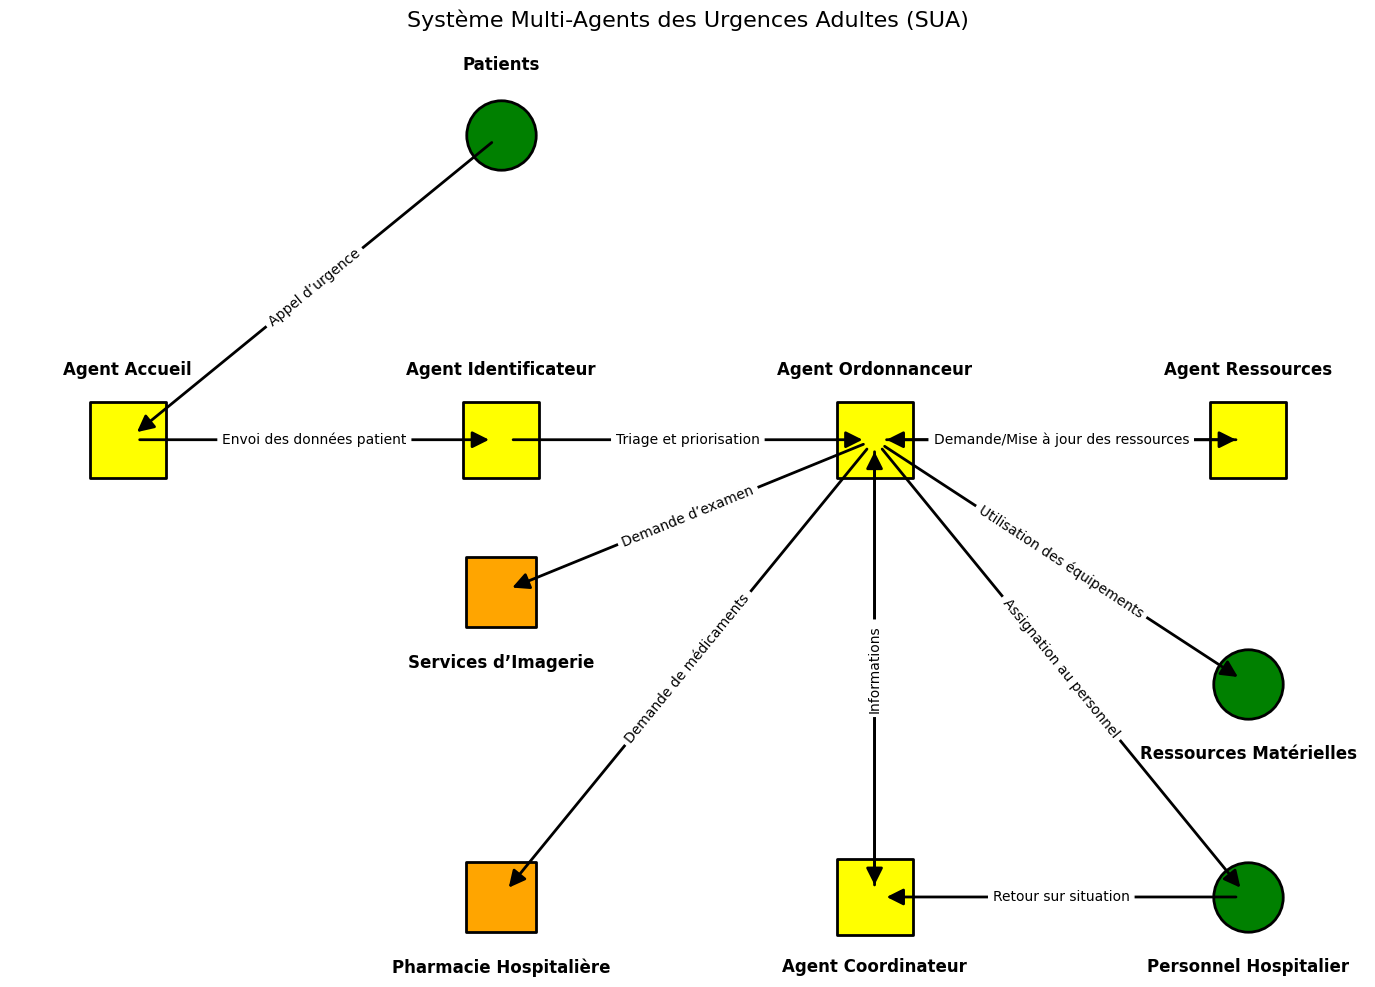

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

# Création du graphe
G = nx.DiGraph()

# Ajout des agents (en jaune, carrés)
agents = ["Agent Accueil", "Agent Identificateur", "Agent Ordonnanceur", "Agent Ressources", "Agent Coordinateur"]
for agent in agents:
    G.add_node(agent, color="yellow")

# Ajout des entités externes (patients, personnel, ressources, services)
external_nodes = [
    ("Patients", "green", "o"),  # Patients en vert, cercles
    ("Personnel Hospitalier", "green", "o"),  # Personnel en vert, cercles
    ("Ressources Matérielles", "green", "o"),  # Ressources matérielles en vert, cercles
    ("Services d’Imagerie", "orange", "s"),  # Services en orange, carrés
    ("Pharmacie Hospitalière", "orange", "s")  # Pharmacie en orange, carrés
]
for node, color, shape in external_nodes:
    G.add_node(node, color=color, shape=shape)

# Ajout des interactions (flèches avec étiquettes, basées sur votre image)
interactions = [
    ("Patients", "Agent Accueil", "Appel d’urgence"),
    ("Agent Accueil", "Agent Identificateur", "Envoi des données patient"),
    ("Agent Identificateur", "Agent Ordonnanceur", "Triage et priorisation"),
    ("Agent Ordonnanceur", "Agent Ressources", "Demande/Mise à jour des ressources"),
    ("Agent Ordonnanceur", "Agent Coordinateur", "Informations"),
    ("Agent Coordinateur", "Agent Ordonnanceur", "Informations"),
    ("Agent Ressources", "Agent Ordonnanceur", "Demande/Mise à jour des ressources"),
    ("Agent Ordonnanceur", "Ressources Matérielles", "Utilisation des équipements"),
    ("Agent Ordonnanceur", "Personnel Hospitalier", "Assignation au personnel"),
    ("Agent Ordonnanceur", "Services d’Imagerie", "Demande d’examen"),
    ("Agent Ordonnanceur", "Pharmacie Hospitalière", "Demande de médicaments"),
    ("Personnel Hospitalier", "Agent Coordinateur", "Retour sur situation"),
]

G.add_edges_from([(src, dst, {"label": label}) for src, dst, label in interactions])

# Positions des nœuds
pos = {
    "Patients": (4, 3),  # Haut (entrée des patients)
    "Agent Accueil": (2, 2),  # Haut gauche
    "Agent Identificateur": (4, 2),  # Haut centre
    "Agent Ordonnanceur": (6, 2),  # Centre
    "Agent Ressources": (8, 2),  # Haut droite
    "Agent Coordinateur": (6, 0.5),  # Bas droite
    "Personnel Hospitalier": (8, 0.5),  # Droite (personnel)
    "Ressources Matérielles": (8, 1.2),  # Droite haut (ressources)
    "Services d’Imagerie": (4, 1.5),  # Bas centre (imagerie)
    "Pharmacie Hospitalière": (4, 0.5)  # Bas droite (pharmacie)
}

# Dessin du graphe
plt.figure(figsize=(14, 10))  # Taille ajustée pour inclure tous les nœuds
plt.title("Système Multi-Agents des Urgences Adultes (SUA)", fontsize=16, pad=20)

# Dessiner les nœuds avec des formes et couleurs identiques à votre image
node_colors = [G.nodes[n]["color"] for n in G.nodes()]
for node in G.nodes():
    if G.nodes[node]["color"] == "green":  # Patients, personnel, ressources (cercles verts)
        plt.scatter(pos[node][0], pos[node][1], s=2500, c=G.nodes[node]["color"], marker='o', edgecolors='black', linewidths=2)
    elif G.nodes[node]["color"] == "yellow":  # Agents (carrés jaunes)
        plt.scatter(pos[node][0], pos[node][1], s=3000, c=G.nodes[node]["color"], marker='s', edgecolors='black', linewidths=2)
    elif G.nodes[node]["color"] == "orange":  # Services externes (carrés oranges)
        plt.scatter(pos[node][0], pos[node][1], s=2500, c=G.nodes[node]["color"], marker='s', edgecolors='black', linewidths=2)

# Ajouter les étiquettes des nœuds avec ajustement vertical pour éviter les chevauchements avec les flèches
for node, (x, y) in pos.items():
    # Ajuster la position verticale des étiquettes pour éviter les flèches
    if node in ["Personnel Hospitalier", "Ressources Matérielles"]:  # Haut droite
        plt.text(x, y - 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="top")
    elif node in ["Agent Ordonnanceur", "Agent Accueil", "Agent Identificateur"]:  # Centre
        plt.text(x, y + 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="bottom")
    elif node in ["Agent Coordinateur", "Services d’Imagerie", "Pharmacie Hospitalière"]:  # Bas
        plt.text(x, y - 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="top")
    elif node in ["Agent Ressources"]:  # Droite
        plt.text(x, y + 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="bottom")
    elif node in ["Patients"]:  # Haut
        plt.text(x, y + 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="bottom")

# Dessiner les arêtes et les étiquettes
nx.draw_networkx_edges(G, pos, arrowsize=25, edge_color="black", width=2)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="black", label_pos=0.5)

# Ajuster l’affichage
plt.axis("off")
plt.tight_layout()
plt.show()
